Link of deployed app: https://med7diagnosis.herokuapp.com/

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import  Model, Sequential
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.config.experimental.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [3]:
IMAGE_SIZE = [224, 224]
train_path = 'datasets/cell_images/train'
test_path = 'datasets/cell_images/test'

In [4]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
folders = glob(train_path + '/*')
folders

['datasets/cell_images/train\\Parasitized',
 'datasets/cell_images/train\\Uninfected']

In [7]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_data = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 27158 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [11]:
r = model.fit(train_data, validation_data=test_data, epochs=10, steps_per_epoch=len(train_data), validation_steps=len(test_data))

Epoch 1/10
849/849 [==============================] - 251s 296ms/step - loss: 0.3829 - accuracy: 0.8389 - val_loss: 0.2919 - val_accuracy: 0.8850
Epoch 2/10
849/849 [==============================] - 264s 311ms/step - loss: 0.2766 - accuracy: 0.8924 - val_loss: 0.3302 - val_accuracy: 0.8875
Epoch 3/10
849/849 [==============================] - 262s 309ms/step - loss: 0.2698 - accuracy: 0.8962 - val_loss: 0.1534 - val_accuracy: 0.9400
Epoch 4/10
849/849 [==============================] - 266s 313ms/step - loss: 0.2658 - accuracy: 0.9021 - val_loss: 0.2991 - val_accuracy: 0.8950
Epoch 5/10
849/849 [==============================] - 266s 313ms/step - loss: 0.2629 - accuracy: 0.9071 - val_loss: 0.3250 - val_accuracy: 0.9000
Epoch 6/10
849/849 [==============================] - 268s 316ms/step - loss: 0.2682 - accuracy: 0.9050 - val_loss: 0.1490 - val_accuracy: 0.9500
Epoch 7/10
849/849 [==============================] - 265s 312ms/step - loss: 0.2559 - accuracy: 0.9124 - val_loss: 0.1680 -

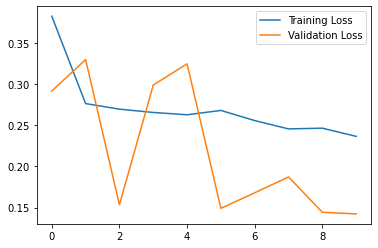

In [12]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

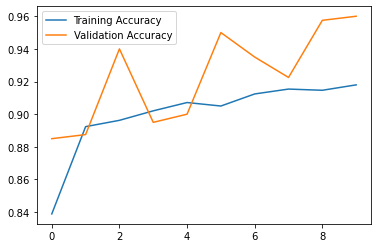

In [13]:
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [14]:
model.save('malaria_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: malaria_model\assets


In [20]:
from tensorflow.keras.preprocessing.image import load_img

model = tf.keras.models.load_model('malaria_model')

img = load_img('F:/dataScienceCompleteProjects/MedicalDiagnosis/datasets/cell_images/test/Parasitized/C189P150ThinF_IMG_20151203_140809_cell_128.png', target_size=(224,224))
x = image.img_to_array(img)
x/=255
x = np.expand_dims(x, axis=0)
print(np.argmax(model.predict(x), axis=1))

img = load_img('F:/dataScienceCompleteProjects/MedicalDiagnosis/datasets/cell_images/test/Uninfected/C239ThinF_IMG_20151127_113223_cell_38.png', target_size=(224,224))
x = image.img_to_array(img)
x/=255
x = np.expand_dims(x, axis=0)
print(np.argmax(model.predict(x), axis=1))

img = load_img('F:/dataScienceCompleteProjects/MedicalDiagnosis/datasets/cell_images/test/Parasitized/C189P150ThinF_IMG_20151203_140809_cell_130.png', target_size=(224,224))
x = image.img_to_array(img)
x/=255
x = np.expand_dims(x, axis=0)
print(np.argmax(model.predict(x), axis=1))

img = load_img('F:/dataScienceCompleteProjects/MedicalDiagnosis/datasets/cell_images/test/Uninfected/C240ThinF_IMG_20151127_115306_cell_6.png', target_size=(224,224))
x = image.img_to_array(img)
x/=255
x = np.expand_dims(x, axis=0)
print(np.argmax(model.predict(x), axis=1))

[0]
[1]
[0]
[1]


In [21]:
train_data[0]

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [